In [118]:
import pandas as pd

In [ ]:
path = "data"

In [120]:
df_fake = pd.read_csv(path+"/fakes.csv")
df_true = pd.read_csv(path+"/true.csv")

 fake news (rótulo = 1) e a outra contendo apenas notícias verdadeiras (rótulo = 0).

In [121]:
df_true

,title,text,origin,url,label,publisher_name,publisher_site,date
0,Jovem Pan: o que é falso e o que é verdadeiro ...,As propostas de manter zerados impostos federa...,Jair Bolsonaro,https://lupa.uol.com.br/jornalismo/2022/09/06/...,0,Lupa - UOL,lupa.uol.com.br,NaN
1,Jovem Pan: o que é falso e o que é verdadeiro ...,Estatais dão lucro de mais de R$ 100 bilhões e...,Jair Bolsonaro,https://lupa.uol.com.br/jornalismo/2022/09/06/...,0,Lupa - UOL,lupa.uol.com.br,NaN
2,De cargos secretos a segurança: veja erros e a...,A água foi privatizada. A Cedae não acabou. Es...,Marcelo Freixo (PSB),https://lupa.uol.com.br/jornalismo/2022/09/01/...,0,Lupa - UOL,lupa.uol.com.br,NaN
3,De cargos secretos a segurança: veja erros e a...,São quase 3 milhões de pessoas passando fome [...,Marcelo Freixo (PSB),https://lupa.uol.com.br/jornalismo/2022/09/01/...,0,Lupa - UOL,lupa.uol.com.br,NaN
4,De cargos secretos a segurança: veja erros e a...,[Cláudio Castro] tem pouco mais de 20% de ótim...,Marcelo Freixo (PSB),https://lupa.uol.com.br/jornalismo/2022/09/01/...,0,Lupa - UOL,lupa.uol.com.br,NaN
...,...,...,...,...,...,...,...,...
2715,Um cachorro foi colocado em quarentena em Hong...,Teste em cão dá positivo para o novo coronavírus,Várias fontes,https://checamos.afp.com/um-cachorro-foi-coloc...,0,AFP Checamos,checamos.afp.com,2020-02-28T00:00:00Z
2716,A Prefeitura de Tucumã está entregando kits co...,Está com suspeita de coronavírus leva o kit pr...,Várias fontes,https://checamos.afp.com/prefeitura-de-tucuma-...,0,AFP Checamos,checamos.afp.com,2020-05-17T00:00:00Z
2717,O então presidente eleito Jair Bolsonaro disse...,Bolsonaro afirmou em 2018 que o indulto de Nat...,Múltiplas fontes,https://checamos.afp.com/o-entao-presidente-el...,0,AFP Checamos,checamos.afp.com,2019-12-23T00:00:00Z
2718,"Sim, Jair Bolsonaro declarou que a chegada de ...",Jair Bolsonaro declarou que a chegada de Hugo ...,Checamos,https://checamos.afp.com/sim-jair-bolsonaro-de...,0,AFP Checamos,checamos.afp.com,NaN


In [122]:
df_fake["data"] = df_fake["title"] + " " + df_fake["text"]
df_true["data"] = df_true["title"] + " " + df_true["text"]
df_fake_limpa = df_fake.drop(df_fake.columns[[0,1,2,3, 5,6, 7]], axis=1)
df_true_limpa = df_true.drop(df_true.columns[[0,1,2,3,5, 6, 7]], axis=1)

In [123]:
 # Aumentando a amostra de noticias reais
df_true_limpa = pd.concat([df_true_limpa] * 9, ignore_index=True)

In [124]:
df_fake_limpa

,label,data
0,1,Vídeo com vaias a Nando Reis teve áudio manipu...
1,1,Documentos confirmam uso de dinheiro vivo na c...
2,1,G1 não publicou notícia de que rainha Elizabet...
3,1,TSE não proibiu governo de tomar medidas para ...
4,1,É falso que órgão de saúde dos EUA passou a re...
...,...,...
20473,1,Paulo Guedes gastou mesmo R$ 120 mil com Viagr...
20474,1,A Força Aérea Brasileira produziu 100 mil metr...
20475,1,Cuba adotou com sucesso a cloroquina no tratam...
20476,1,A Cinderela usava sapatos de pele de esquilos ...


# Pre processamento

In [125]:
df_news = pd.concat([df_fake_limpa, df_true_limpa])

In [126]:
# Baixar o modelo de linguagem 'pt_core_news_lg' para o spaCy
!python -m spacy download pt_core_news_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 3.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [127]:
import string
import spacy
import unicodedata
from tqdm import tqdm
import pandas as pd
import numpy as np

# Habilita o suporte do tqdm para métodos de progressão do pandas (como progress_apply)
# Com isso, é possível ver barras de progresso em operções feitas no Pandas
tqdm.pandas()


In [128]:

# Carrega o modelo de linguagem 'pt_core_news_lg' do spaCy para processamento de texto em português
# Desabilita os componentes 'parser' e 'ner', já que não são necessários para a lematização
spacy_nlp_model = spacy.load("pt_core_news_lg", disable=["parser", "ner"])

def preprocess_data(df, text_column):


    # Cria uma tabela de tradução que mapeia cada caractere de pontuação do módulo `string.punctuation`
    # para `None` (ou seja, remove-os do texto).
    print("Removendo pontuação...")
    translator = str.maketrans('', '', string.punctuation) # Só usamos o terceiro parâmetro, que mapeia ocorrências de string.punctuation para None
    df[text_column] = df[text_column].progress_apply(lambda x: x.translate(translator))

    print("Removendo números...")
    translator = str.maketrans('', '', string.digits)
    df[text_column] = df[text_column].progress_apply(lambda x: x.translate(translator))

    print("Removendo aspas...")
    df[text_column] = df[text_column].progress_apply(lambda x: x.replace('"', '').replace("'", ''))  # Remove tanto aspas duplas quanto simples

    print("Removendo acentos e símbolos diversos...")
    def remove_accents_and_symbols(text):
        try:
            # Normaliza a string para a forma NFKD e mantém apenas caracteres que não são diacríticos
            # nem combinam caracteres com diacríticos
            return ''.join(c for c in unicodedata.normalize('NFKD', text) if not unicodedata.combining(c) and unicodedata.category(c) != 'Mn')
        except TypeError:
            # Se não for possível normalizar um caractere, retorna uma string vazia
            return ''

    # Aplica a função 'remove_accents_and_symbols' na coluna 'text_column'
    df[text_column] = df[text_column].progress_apply(lambda x: remove_accents_and_symbols(x))

    print("Convertendo para minúsculas...")
    df[text_column] = df[text_column].progress_apply(lambda x: x.lower())

    print("Computando Lematização...")
    def lemmatize_text(doc):
        return [token.lemma_ for token in doc if not token.is_stop]

    n_chunks = 10  # Ajuste esse valor de acordo com o tamanho da base de dados e a memória disponível no sistema
    chunks = np.array_split(df, n_chunks) # Divide o dataframe em várias partes

    processed_chunks = []
    for i, chunk in enumerate(chunks):
        print(f"Processando segmento {i + 1} de {n_chunks}")
        processed_chunk = chunk.copy() # Cria uma cópia para realizar o processamento

        #  Aplica a função 'lemmatize_text' a cada documento processado pelo spaCy (usando 'spacy_nlp_model.pipe') e
        # atribui os resultados (uma lista de palavras lematizadas) à coluna 'text_column' do DataFrame 'processed_chunk'.
        # O tqdm é utilizado para exibir uma barra de progresso durante o processamento dos documentos.
        processed_chunk[text_column] = [lemmatize_text(doc) for doc in tqdm(spacy_nlp_model.pipe(chunk[text_column].astype(str), batch_size=100, disable=['parser', 'ner']), total=len(chunk[text_column]))]

        # Junta as partes em uma lista, para formar o dataframe final
        processed_chunks.append(processed_chunk)

    concatenated_df = pd.concat(processed_chunks) # Concatenar os DataFrames processados
    df[text_column] = concatenated_df[text_column] # Atribuir a coluna 'data' processada de volta ao dataframe original

    print("Remover tokens com espaços vazios...")
    df['data'] = df['data'].progress_apply(lambda x: [token for token in x if token.strip()])

In [129]:
preprocess_data(df_news, 'data') # Realiza o pré-processamento

Removendo pontuação...


100%|██████████| 44958/44958 [00:01<00:00, 29814.19it/s]


Removendo números...


100%|██████████| 44958/44958 [00:00<00:00, 48209.77it/s]


Removendo aspas...


100%|██████████| 44958/44958 [00:00<00:00, 1111155.42it/s]


Removendo acentos e símbolos diversos...


100%|██████████| 44958/44958 [00:02<00:00, 18290.18it/s]


Convertendo para minúsculas...


100%|██████████| 44958/44958 [00:00<00:00, 297706.38it/s]
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Computando Lematização...
Processando segmento 1 de 10


100%|██████████| 4496/4496 [00:20<00:00, 215.42it/s]


Processando segmento 2 de 10


100%|██████████| 4496/4496 [00:11<00:00, 394.02it/s]


Processando segmento 3 de 10


100%|██████████| 4496/4496 [00:07<00:00, 620.90it/s]


Processando segmento 4 de 10


100%|██████████| 4496/4496 [00:08<00:00, 521.36it/s]


Processando segmento 5 de 10


100%|██████████| 4496/4496 [00:07<00:00, 613.70it/s]


Processando segmento 6 de 10


100%|██████████| 4496/4496 [00:07<00:00, 578.92it/s]


Processando segmento 7 de 10


100%|██████████| 4496/4496 [00:06<00:00, 685.10it/s]


Processando segmento 8 de 10


100%|██████████| 4496/4496 [00:07<00:00, 589.45it/s]


Processando segmento 9 de 10


100%|██████████| 4495/4495 [00:06<00:00, 682.17it/s]


Processando segmento 10 de 10


100%|██████████| 4495/4495 [00:07<00:00, 581.62it/s]


Remover tokens com espaços vazios...


100%|██████████| 44958/44958 [00:00<00:00, 382526.37it/s]


In [130]:
df_news.to_pickle(path+"/df_news.pkl")


# Preparação dos dados para o modelo de machine learning


In [133]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import regularizers
import numpy as np
import pandas as pd

In [134]:
# Carregar dataframe salvo em formato pickle
df_news = pd.read_pickle(path+"/df_news.pkl")

In [135]:
texts = df_news['data'].tolist()  # Converte as notícias em listas de palavras, algo que o Tokenizador espera
labels = df_news['label'].tolist()  # Rótulos das notícias


In [136]:

# Tokenização
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

In [137]:
import pickle

# Salva o tokenizador em um arquivo (precisamos dele mais tarde, quando realizarmos as inferências)
with open(path + '/tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

In [138]:
# Calcula o comprimento de cada sequência em 'sequences' e armazena os resultados na lista 'sequence_lengths'
sequence_lengths = [len(seq) for seq in sequences]

# Calcula a média dos comprimentos das sequências usando a função 'mean' do numpy
mean_length = np.mean(sequence_lengths)

# Obtém o comprimento máximo das sequências usando a função 'max' do Python
max_length = max(sequence_lengths)

# Imprime a média e o comprimento máximo das sequências
print("Mean sequence length: ", mean_length)
print("Maximum sequence length: ", max_length)

Mean sequence length:  17.609591173984608
Maximum sequence length:  683


In [139]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Calcula o percentil 95 dos comprimentos das sequências (preserva 95% das sequências)
max_length = int(np.percentile(sequence_lengths, 95))

# Realiza o preenchimento das sequências com base no novo 'max_length'
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')


In [140]:
embeddings_index = {}
with open(path + '/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [141]:
embedding_dim = 100  # o tamanho do seu GLoVe embeddings
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [142]:
num_classes = len(np.unique(labels))  # Número de classes únicas
labels = to_categorical(labels, num_classes=num_classes)


In [143]:
from sklearn.model_selection import train_test_split

# Divida os dados em um conjunto de treino (70%) e um conjunto temporário (30%)
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.3)

# Divida o conjunto temporário em conjuntos de validação (15%) e teste (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)  # 0.5 * 0.3 = 0.15

In [144]:
import tensorflow as tf

# Verifique se há GPUs disponíveis
print("GPUs disponíveis: ", tf.config.list_physical_devices('GPU'))


GPUs disponíveis:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [147]:
# Construindo o modelo

model = Sequential()

model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(32, return_sequences=True, kernel_regularizer=regularizers.l2(0.02))))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(64, kernel_regularizer=regularizers.l2(0.02))))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='sigmoid', kernel_regularizer=regularizers.l2(0.02)))


# Chamada ao Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(X_train, y_train, batch_size=128, epochs=40, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6404 - loss: 4.2916 - val_accuracy: 0.7322 - val_loss: 0.6291
Epoch 2/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7473 - loss: 0.5940 - val_accuracy: 0.6822 - val_loss: 0.6293
Epoch 3/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7532 - loss: 0.5616 - val_accuracy: 0.7577 - val_loss: 0.5600
Epoch 4/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7657 - loss: 0.5447 - val_accuracy: 0.7457 - val_loss: 0.5666
Epoch 5/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7636 - loss: 0.5418 - val_accuracy: 0.7501 - val_loss: 0.5630
Epoch 6/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7673 - loss: 0.5345 - val_accuracy: 0.7602 - val_loss: 0.5514
Epoch 7/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7614 - loss: 0.5468 - val_accuracy: 0.7665 - val_loss: 0.5392
Epoch 8/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7718 - loss: 0.5303 - val_accu

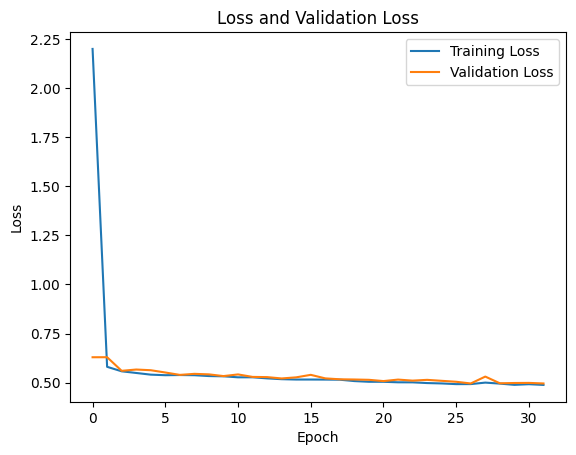

In [148]:
import matplotlib.pyplot as plt

# Plota a perda (loss) e a perda de validação (val_loss) durante o treinamento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Salvando

In [149]:
# Salva arquivos em discos que podemos carregar sem treinar a rede neural novamente
model.save(path+'/BiLSTM_glove6b100d.keras')
np.save(path+"/X_test_BiLSTM_glove6b100d.npy", X_test)
np.save(path+"/y_test_BiLSTM_glove6b100d.npy", y_test)

# avaliando

In [150]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Acurácia final:', accuracy)

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7983 - loss: 0.5125
Acurácia final: 0.8033807873725891


In [151]:
y_pred = model.predict(X_test)

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [152]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


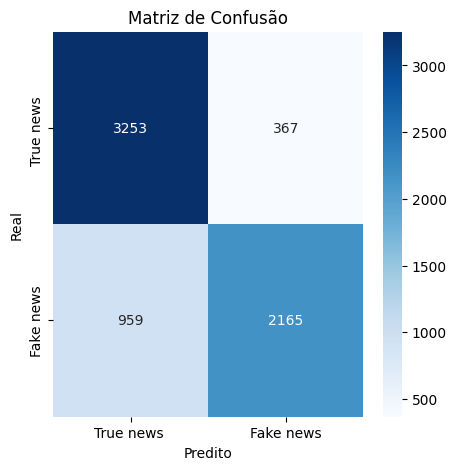

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      3620
           1       0.86      0.69      0.77      3124

    accuracy                           0.80      6744
   macro avg       0.81      0.80      0.80      6744
weighted avg       0.81      0.80      0.80      6744



In [153]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prevendo nos dados de validação
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.15).astype(int)  # Convertendo para 0 ou 1

# Criando a matriz de confusão
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plotando a matriz de confusão
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["True news ", "Fake news"], yticklabels=["True news ", "Fake news"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Exibindo métricas como F1-score, precisão e recall
print(classification_report(y_true_labels, y_pred_labels))
